---

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарии от тимлида ✔️ : </b> 


Итог ревью - была проделана отличная работа! Редко кто сдает проект с первого раза без критичных замечаний, но ты справилась с этой задачей) Исследование получилось объемным, но ты всё сделала грамотно.
    
Структура и логика исследования корректные. Ты хорошо провела исследовательский этап и рассчитала метрики правильно. Ответила на все вопросы заказчика и очень радует, что проверка гипотез проведена успешно. Молодец!


</div>

# Анализ поведения пользователей в мобильном приложении

`Предоставлены данные о событиях, совершенных пользователями в мобильном приложении "Ненужные вещи". В нем одни пользователи продают свои ненужные вещи, размещая их на доске объявлений, а другие – покупают.`

**Целевая аудитория исследования:** покупатели. 

**Заказчик исследования:** Product Manager

**Цель исследования:** проанализировать и описать поведение пользователей, чтобы в дальнейшем заказчик смог сегментировать пользователей и влиять на их вовлеченность.

**Целевое действие** - contacts_show и show_contacts — посмотрел номер телефона. 

**Принято коллективное решение не приравнивать "contacts_call" к целевому т.к. не всегда звонки совершаются прямо из приложения.**

**ЗАДАЧИ:**

1. Рассмотреть различные сценарии действий пользователей, которые содержат/не содержат целевое действие;

2. Выделить этапы сценариев (действия), которые чаще ведут к просмотру контактов. А так же этапы, которые реже приводят к просмотру контактов;

3. Выдвинуть предположения, почему и как функционал приложения (действия) влияет на конверсию в целевое действие;

4. Посмотреть как различается время между поиском и открытием объявления у пользователей, совершающих и не совершающих целевое действие;

5. Проверить следующие гипотезы:

- Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.

- Одни пользователи совершают действия advert_open и favorites_add, другие — только advert_open. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.

**ОСНОВНЫЕ ШАГИ:**

- определить тайм-аут;

- выделить сессии пользователей;

- выделить сценарии;

- разделить пользователей по 2ум группам сценариев: содержащие и не содержащие целевое действие;

- посчитать конверсию в просмотр контактов по уникальным пользователям;

- посмотреть разницу в длительности сессий и количестве действий между 2мя группами пользователей;

- в рамках разделенных на 2 группы пользователей посмотреть какие действия совершаются чаще, а какие реже;

- построить воронки по типичным сценариям, среди тех, которые содержат целевое действие; 

- если поиск это search_1—search_7, а открытие объявления - advert_open, то в рамках разделенных на 2 группы пользователей, посчитать время между этими действиями.

 **Описание данных:**

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в mobile_dataset.csv: **

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

# Загрузка и предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
pd.set_option("display.float_format", "{:.3f}".format)
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# открываем таблицу 'mobile_dataset'
mobile_dataset = pd.read_csv(r"C:\Users\Lenovo\Desktop\Github проекты\mobile_dataset.csv")
display(mobile_dataset)
print()
mobile_dataset.info()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [3]:
# меняем названия столбцов
mobile_dataset.columns = ['event_time', 'event_name', 'user_id']

In [4]:
# изменяем тип данных c object на datetime
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [5]:
# количество уникальных пользователей таблицы 'mobile_dataset'
mobile_dataset['user_id'].nunique() 

4293

In [6]:
# смотрим наименования уникаьных событий
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [7]:
# приравниваем 'show_contacts' к 'contacts_show' т.к. это одинаковые события
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show')

In [8]:
# открываем таблицу 'mobile_sourсes'
mobile_sourсes = pd.read_csv(r"C:\Users\Lenovo\Desktop\Github проекты\mobile_sourсes.csv") 
display(mobile_sourсes)
print()
mobile_sourсes.info()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [9]:
# меняем названия столбцов
mobile_sourсes.columns = ['user_id', 'source']

In [10]:
# смотрим распределение пользователей по источникам прихода
source_user_id_number = mobile_sourсes.groupby('source').agg({'user_id': 'nunique'}).sort_values(by= 'user_id' , ascending=False).reset_index()
source_user_id_number 

,source,user_id
0,yandex,1934
1,other,1230
2,google,1129


- **Источник большинства пользователей - "yandex", затем "other" и "google".**

In [11]:
# количество уникальных пользователей таблицы 'mobile_sourсes'
mobile_sourсes['user_id'].nunique() 

4293

In [12]:
# объединяем таблицу 'mobile_dataset' и 'mobile_sourсes' 
common = mobile_dataset.merge(mobile_sourсes, on = 'user_id')

# сортируем события в разрезе пользователей 
common.sort_values(['user_id', 'event_time'])
common

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
...,...,...,...,...
74192,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74193,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74194,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74195,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google


In [13]:
# проверям совпали ли пользователи при объединении таблиц
common['user_id'].nunique() 

4293

- **Количество уникальных пользователей осталось неизменным - 4293 и равным значениям обоих таблиц.**

In [14]:
# проверяем на явные дубликаты 
common.duplicated().sum()

0

In [15]:
# проверяем на неявные дубликаты 
common.duplicated(subset=['event_time']).sum()

0

In [16]:
# время первого действия в данных
common['event_time'].min()

Timestamp('2019-10-07 00:00:00.431357')

In [17]:
# время последнего действия в данных
common['event_time'].max()

Timestamp('2019-11-03 23:58:12.532487')

In [18]:
# период за который представлены данные
test_period = common['event_time'].max() - common['event_time'].min()
test_period

Timedelta('27 days 23:58:12.101130')

**`Данные корректны:`**

- **Нет пропусков;**
- **Нет явных и неявных дубликатов;**
- **Данные приведены к нужным типам;**
- **Названия столбцов имеют общепринятый вид.**

**`Обнаружено:`**

- **Количество уникальных пользователец - 4293;**
- **Представлены данные за период с 2019-10-07 00:00:00 по 2019-11-03 23:58:12. В сумме почти 28 дней;**
- **Источник большинства пользователей - "yandex", затем "other" и "google".**

# Исследовательский анализ данных

## Отпределение тайм-аута и выделение сессий пользователей

In [19]:
# посмотрим на разницу в минутах между действиями всей таблицы
common['difference'] = (common.groupby('user_id')['event_time'].diff().dt.total_seconds().fillna(0) / 60) 

# если это первое действие пользователя, то в 'difference' стоят нули
display(common.head())
common['difference'].describe()

,event_time,event_name,user_id,source,difference
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0.000
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.013
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.097
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1.346
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.117


count   74197.000
mean      219.537
std      1488.939
min         0.000
25%         0.273
50%         1.061
75%         2.790
max     38269.914
Name: difference, dtype: float64

- Среднее значение 'difference' сильно завышено относительно медианы из-за выбросов. 

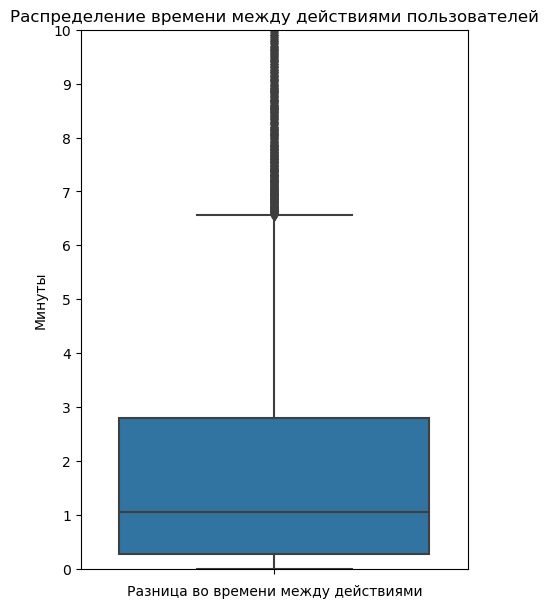

In [20]:
# строим диаграмму разброса времени между действиями - 'difference'
plt.figure(figsize=(5, 7))
sport = sns.load_dataset('exercise')
ax = sns.boxplot(y='difference', data=common) 
plt.xlabel('Разница во времени между действиями')
plt.xticks(rotation = 55)
plt.ylabel('Минуты')
plt.title('Распределение времени между действиями пользователей')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylim(0, 10)
plt.show()

In [21]:
# посмотрим разспределение 'difference' по перцентилям
x = np.percentile(common['difference'], [25, 85, 91, 92, 93, 94,  95, 99])
x.tolist()

[0.27260665,
 5.680629386666665,
 20.047997487333344,
 33.771809570000286,
 65.73104018066657,
 152.14705348399764,
 426.47733404665894,
 6664.092717617869]

- **По перцентилям получается, что не больше 10% данных имеют разницу между действиями от 20 минут.**
- **При этом примерно в 85% данных пользователи переключаются между действиями в течение 5-6 минут.** 
- **`Исходя из данных "ящика с усами" и перцентилей, примем за туйм-аут - 5 минут.`**

In [22]:
# выделим сессии относительно тайм-аута
g = (common.groupby('user_id')['event_time'].diff() > pd.Timedelta('5Min')).cumsum()
common['session_id'] = common.groupby(['user_id', g], sort=False).ngroup() + 1
common

,event_time,event_name,user_id,source,difference,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0.000,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.013,1
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.097,1
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1.346,1
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0.117,1
...,...,...,...,...,...,...
74192,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,0.000,16366
74193,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,0.197,16366
74194,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,0.039,16366
74195,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,0.771,16366


- **Если между событиями время больше 5 минут, то они относятся к разным сессиям.**
- **Всего сессий 16366.**
- **Всего действий совершено в приложении -  74197.**

## Выделение сценариев

In [23]:
# создаем таблицу с последовательностью действий в каждой сессии
sequence_per_session = common.groupby(['user_id', 'session_id']).agg({'event_name':'unique'}).sort_values('session_id', ascending=True).reset_index()
sequence_per_session.columns = ['user_id', 'session_id', 'scenario']
sequence_per_session

,user_id,session_id,scenario
0,020292ab-89bc-4156-9acf-68bc2783f894,1,"[advert_open, tips_show, map]"
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,"[tips_show, advert_open]"
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,3,[tips_show]
3,cf7eda61-9349-469f-ac27-e5b6f5ec475c,4,"[tips_show, tips_click]"
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,5,"[advert_open, tips_show, search_4, map]"
...,...,...,...
16361,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,16362,[tips_show]
16362,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,16363,[tips_show]
16363,437a4cd4-9ba9-457f-8614-d142bc48fbeb,16364,[tips_show]
16364,c10055f0-0b47-477a-869e-d391b31fdf8f,16365,"[contacts_show, tips_click]"


In [24]:
# создаём функцию, которая извлекает в каждой строке таблицы элементы из списка действий за сессию и записывает их в строку
yes = []
for i in sequence_per_session['scenario']:
    f1 = ", ".join(i)
    yes.append(f1)

scenario_correct = pd.DataFrame(yes, columns=['scenario_correct'])
scenario_correct

,scenario_correct
0,"advert_open, tips_show, map"
1,"tips_show, advert_open"
2,tips_show
3,"tips_show, tips_click"
4,"advert_open, tips_show, search_4, map"
...,...
16361,tips_show
16362,tips_show
16363,tips_show
16364,"contacts_show, tips_click"


In [25]:
# заменяем в таблице "sequence_per_session" списки последовательностью действий в каждой сессии на строки
sequence_per_session['scenario'] = yes
sequence_per_session.sort_values('session_id', ascending=True)

,user_id,session_id,scenario
0,020292ab-89bc-4156-9acf-68bc2783f894,1,"advert_open, tips_show, map"
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,"tips_show, advert_open"
2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,3,tips_show
3,cf7eda61-9349-469f-ac27-e5b6f5ec475c,4,"tips_show, tips_click"
4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,5,"advert_open, tips_show, search_4, map"
...,...,...,...
16361,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,16362,tips_show
16362,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,16363,tips_show
16363,437a4cd4-9ba9-457f-8614-d142bc48fbeb,16364,tips_show
16364,c10055f0-0b47-477a-869e-d391b31fdf8f,16365,"contacts_show, tips_click"


In [26]:
# объединяем получившуюся таблицу со сценариями и таблицу с деталями сессий "sessions_details"
general = common.merge(sequence_per_session, on = ['session_id', 'user_id'])
general = general.drop(columns = ['difference'], axis = 1)
general

,event_time,event_name,user_id,source,session_id,scenario
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
...,...,...,...,...,...,...
74192,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
74193,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
74194,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
74195,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"


## Разделение пользователей на 2 группы: по сценариям с/без целевого действия

In [27]:
# делаем срез датафрейма "general" по сценариям, в которых ЕСТЬ целевое действие
general_contacts_show = general[general['scenario'].str.contains("contacts_show")]
general_contacts_show.reset_index(drop= True)

,event_time,event_name,user_id,source,session_id,scenario
0,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click"
1,2019-10-07 00:05:16.003328,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click"
2,2019-10-07 00:06:01.349291,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click"
3,2019-10-07 00:06:56.367054,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click"
4,2019-10-07 00:09:24.585200,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click"
...,...,...,...,...,...,...
13109,2019-11-03 23:46:31.298524,contacts_show,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,16365,"contacts_show, tips_click"
13110,2019-11-03 23:48:47.344430,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,16365,"contacts_show, tips_click"
13111,2019-11-03 23:50:05.753036,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,16365,"contacts_show, tips_click"
13112,2019-11-03 23:51:08.879296,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,16365,"contacts_show, tips_click"


In [28]:
# посчитаем сколько сессий с целевым действием
general_contacts_show['session_id'].nunique()

2288

In [29]:
# делаем срез датафрейма "general" по сценариям, в которых НЕТ целевого действия
general_not_contacts_show = general[general['scenario'].str.contains("contacts_show")== False]
general_not_contacts_show.reset_index(drop= True)

,event_time,event_name,user_id,source,session_id,scenario
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map"
...,...,...,...,...,...,...
61078,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
61079,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
61080,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"
61081,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,16366,"map, advert_open, tips_show"


In [30]:
# посчитаем сколько сессий без целевого действия
general_not_contacts_show['session_id'].nunique()

14078

In [31]:
# Конверсия уник. пользователей в совершение целевого действия 
proc_goal = general_contacts_show['user_id'].nunique()/general['user_id'].nunique() * 100
print(f'Общая конверсия уник. пользователей в совершение целевого действия : {round(proc_goal, 1)}%')

Общая конверсия уник. пользователей в совершение целевого действия : 22.9%


- **2288 сессий с целевым действием;**

- **14078 сессий без целевого действия;**

- **Конверсия уник. пользователей в совершение целевого действия : 22.9%.**

## Сравнение 2ух групп пользователей по числу действий за сессию и длительности сессии

In [32]:
# создаем датафрейм с уник. сессиями, где отражено количество действий за сессию и длительность сессий
sessions_details = general.groupby(['session_id', 'user_id']).agg({'event_time':['first', 'last'], 'event_name':'count'}).reset_index()
sessions_details.columns = ['session_id', 'user_id', 'first_action', 'last_action', 'number_actions_per_session']
sessions_details['duration_session'] = sessions_details['last_action'] - sessions_details['first_action']

# удаляем личшние столбцы
sessions_details = sessions_details.drop(columns = ['first_action', 'last_action'], axis = 1)

# изменяем формат длительности сессий (преобразуем в минуты)
sessions_details['duration_session'] = sessions_details['duration_session'].dt.total_seconds()/60

sessions_details.head()

,session_id,user_id,number_actions_per_session,duration_session
0,1,020292ab-89bc-4156-9acf-68bc2783f894,28,18.708
1,2,cf7eda61-9349-469f-ac27-e5b6f5ec475c,20,22.627
2,3,cf7eda61-9349-469f-ac27-e5b6f5ec475c,1,0.000
3,4,cf7eda61-9349-469f-ac27-e5b6f5ec475c,4,4.167
4,5,cf7eda61-9349-469f-ac27-e5b6f5ec475c,4,1.607


In [33]:
# объединяем таблицу "sessions_details" c таблицей "general_contacts_show, где сценарии С целевым действием
data_1 = general_contacts_show.merge(sessions_details, on = ['session_id', 'user_id'], how = 'left')
# удаляем личшние столбцы
data_1  = data_1.drop(columns = ['event_time'], axis = 1)
# добавляем новый столбец
data_1['Пользователи:'] = 'Совершавшие “contacts_show“'
data_1.head(3)

,event_name,user_id,source,session_id,scenario,number_actions_per_session,duration_session,Пользователи:
0,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click",18,20.506,Совершавшие “contacts_show“
1,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click",18,20.506,Совершавшие “contacts_show“
2,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,18,"tips_show, contacts_show, tips_click",18,20.506,Совершавшие “contacts_show“


In [34]:
# объединяем таблицу "sessions_details" c таблицей "general_not_contacts_show", где сценарии БЕЗ целевого действияя
data_2 = general_not_contacts_show.merge(sessions_details, on = ['session_id', 'user_id'], how = 'left')
# удаляем личшние столбцы
data_2  = data_2.drop(columns = ['event_time'], axis = 1)
# добавляем новый столбец
data_2['Пользователи:'] = 'НЕ совершавшие “contacts_show“'
data_2.head(3)

,event_name,user_id,source,session_id,scenario,number_actions_per_session,duration_session,Пользователи:
0,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map",28,18.708,НЕ совершавшие “contacts_show“
1,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map",28,18.708,НЕ совершавшие “contacts_show“
2,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,"advert_open, tips_show, map",28,18.708,НЕ совершавшие “contacts_show“


In [35]:
# объединяем таблицы "data_1" и "data_2" по названию столбцов
data = pd.concat([data_1, data_2], axis=0)
data.sort_values('number_actions_per_session', ascending=False)

,event_name,user_id,source,session_id,scenario,number_actions_per_session,duration_session,Пользователи:
5117,favorites_add,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,1278,"tips_show, favorites_add, map",125,55.288,НЕ совершавшие “contacts_show“
5053,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,1278,"tips_show, favorites_add, map",125,55.288,НЕ совершавшие “contacts_show“
5062,map,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,1278,"tips_show, favorites_add, map",125,55.288,НЕ совершавшие “contacts_show“
5061,map,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,1278,"tips_show, favorites_add, map",125,55.288,НЕ совершавшие “contacts_show“
5060,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,1278,"tips_show, favorites_add, map",125,55.288,НЕ совершавшие “contacts_show“
...,...,...,...,...,...,...,...,...
34002,search_1,0a21a0ed-4478-4dd3-beb5-eac850063186,yandex,9152,search_1,1,0.000,НЕ совершавшие “contacts_show“
44746,tips_show,543f1bc6-c773-46d1-af50-a6d8eaa3a620,other,12123,tips_show,1,0.000,НЕ совершавшие “contacts_show“
11624,photos_show,40deaa4d-00e7-4297-9b3f-3b97a285c7bd,yandex,3208,photos_show,1,0.000,НЕ совершавшие “contacts_show“
53912,tips_show,512b5f01-bdf4-4f67-8164-e4982f16af2f,other,14479,tips_show,1,0.000,НЕ совершавшие “contacts_show“


- **`Сценарии с целевым действием помечены в столбце "scenario_with_goal" как "yes", все остальные как "no".`**


- **`Пользователи поделены на 2 группы по столбцу "scenario_with_goal".`**

### Сравнение 2ух групп пользователей по числу действий за сессию

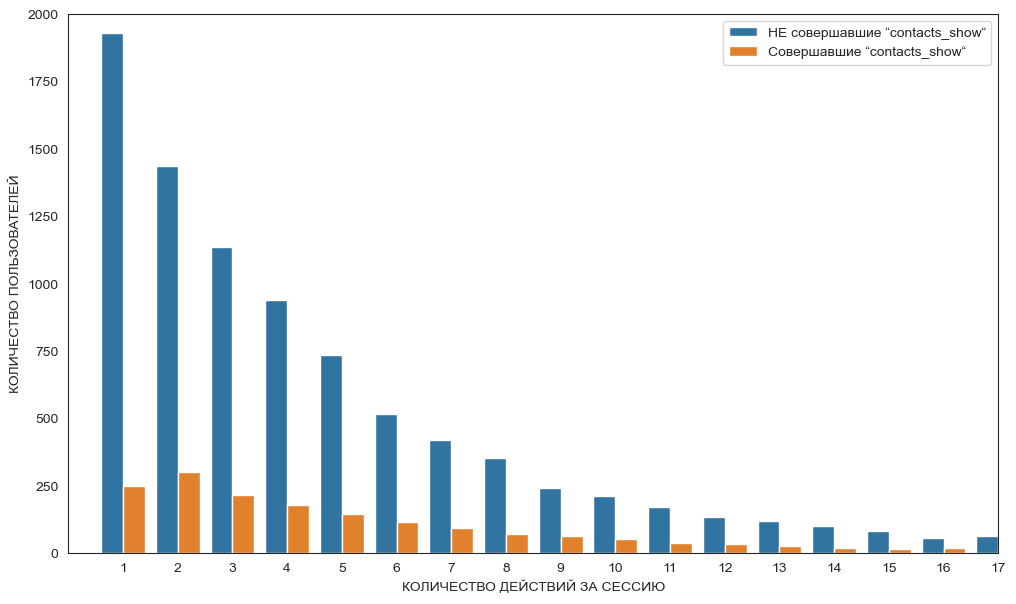

In [36]:
# смотрим сколько действий совершали уник. пользователи 2ух групп
user_actions = data.groupby(['number_actions_per_session', 'Пользователи:'])[['user_id']].nunique().sort_values('user_id', ascending=False).reset_index()
user_actions.columns = ['number_act_per_sess', 'Пользователи:', 'number_users']

# строим столбчатую диаграмму, отражающую соотношение кол-ва пользователей 2ух групп, совершающих определённое кол-во действий за сессию
sns.set_style('white')
plt.figure(figsize=(12, 7))
sns.barplot(x='number_act_per_sess', y='number_users', data=user_actions, hue='Пользователи:')
# plt.title('Cоотношение кол-ва пользователей 2ух групп, совершающих определённое кол-во действий за сессию')
plt.xlabel('КОЛИЧЕСТВО ДЕЙСТВИЙ ЗА СЕССИЮ')
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.legend(loc='lower right', fontsize=10)
plt.ylim(0, 2000)
plt.xlim(-1, 16)
plt.legend(loc='upper right')
plt.show()

- **Нужно учитывать, что пользователи могли совершать несколько сессий.** 


- **`Пользователи, совершившие целевое действие, чаще всего делали 2 дейтсвия за сессию. Следом идут пользователи с 1 и 3 действия за сессию.`** 


- **`Пользователи, НЕ совершившие целевое дейтсвие, чаще всего совершают 1 действие за сессию и по убыванию большее кол-во действий.`**

### Сравнение 2ух групп пользователей по длительности сессий

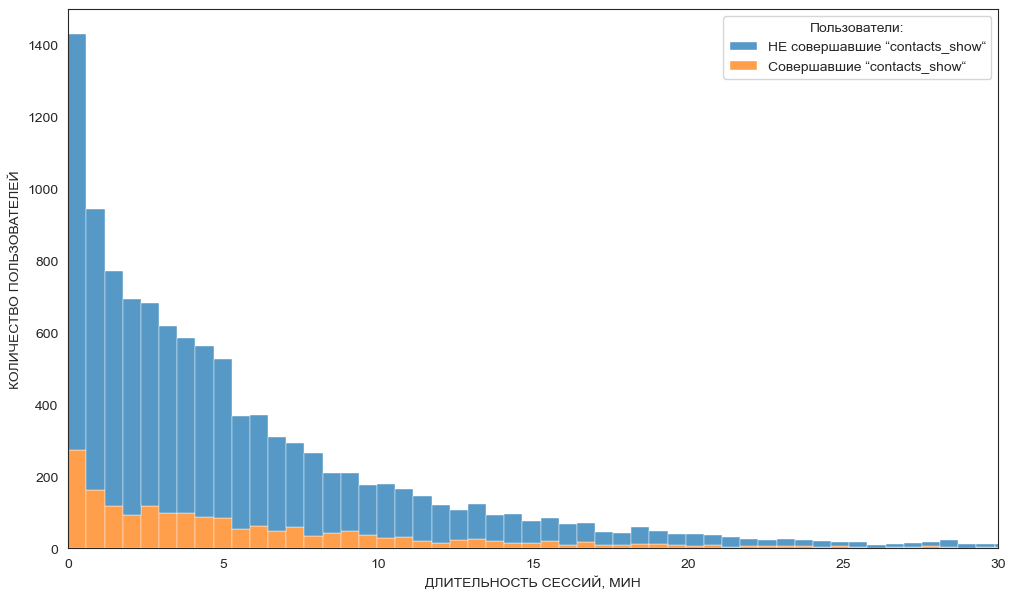

In [37]:
# смотрим какая длительность сессий у уник. пользователей 2ух групп
user_duration_session = data.groupby(['duration_session', 'Пользователи:'])[['user_id']].nunique().sort_values('user_id', ascending=False).reset_index()
user_duration_session.columns = ['duration_session', 'Пользователи:', 'number_users']

# Распределение сессий по длительности среди 2ух групп пользователей
plt.figure(figsize=(12, 7))
sns.set_style('white')
sns.histplot(x='duration_session', data=user_duration_session, hue= 'Пользователи:', multiple='stack')
plt.xlabel('ДЛИТЕЛЬНОСТЬ СЕССИЙ, МИН')
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
#  plt.title('Распределение сессий по длительности среди 2ух групп пользователей')
plt.xlim(0, 30)
plt.ylim(0, 1500)
plt.show()

In [38]:
user_duration_session['duration_session'].max()

118.93949413333334

In [39]:
# посмотрим разспределение 'duration_session' по перцентилям для группы С целевым действием 
y = np.percentile(data_1['duration_session'], [70, 90, 95, 99])
print(y.tolist())
print()

# средняя длительность сессии для группы С целевым действием 
print(data_1['duration_session'].mean())

# средняя длительность сессии для группы С целевым действием БЕЗ учёта сессий = 0 минут
h = data_1.query('duration_session > 00.000')['duration_session'].mean()
h

[14.888458233333333, 29.4931538, 41.53307561666667, 72.31036763333333]

13.350702333046328


13.754506276657205

In [40]:
# посмотрим разспределение 'duration_session' по перцентилям для группы БЕЗ целевого действия
j = np.percentile(data_2['duration_session'], [70, 90, 95, 99])
print(j.tolist())
print()

# средняя длительность сессии для группы БЕЗ целевого действия
print(data_2['duration_session'].mean())

# средняя длительность сессии для группы БЕЗ целевого действия БЕЗ учёта сессий = 0 минут
l = data_2.query('duration_session > 00.000')['duration_session'].mean()
l

[13.59768245, 28.854268533333332, 40.398319783333335, 60.659476833333336]

11.800196324622771


12.814752646308829

- **`Судя по гистограмме и перцентилям, у большинства пользователей обеих групп сессия длится не более 30 минут.`**


- **`Средняя длительность сессии у группы С целевым действием - 13-14 минут, даже без учёта сессий длительностью 0 минут.`**


- **`Средняя длительность сессии у группы БЕЗ целевого действия чуть меньше - 12-13 минут, даже без учёта сессий длительностью 0 минут.`**

#### Пользователи БЕЗ целевого с длит.сессий = 0 минут

In [41]:
# посчитаем процент пользователей НЕ совершивших целевое действие, длительность сессий у которых равна 0 минут
data_3 = data.copy()
data_3 = data_3.query('duration_session == 00.000 & scenario_with_goal =="no"')
data_4 = data.copy()
data_4 = data_4.query('scenario_with_goal =="no"')

proc = data_3['user_id'].nunique()/data_4['user_id'].nunique() *100
print(f'Процент уник. пользователей БЕЗ целевого, длительность сессий у которых равна 0 минут: {round(proc, 1)}%')

UndefinedVariableError: name 'scenario_with_goal' is not defined

In [ ]:
# посмотрим совпадают ли пользователи, совершившие 1 действие за сессии, длительность которых равна 0 минут
user_actions_1 = data.query('number_actions_per_session == 1 & scenario_with_goal =="no"')['user_id'].nunique()
print(f'Кол-во пользователей не совершивших целевое действие, кол-во действий за сессию у которых = 1 : {user_actions_1}')

coincidence = data.query('number_actions_per_session == 1 & scenario_with_goal =="no"')['user_id'].unique().tolist()

user_duration_session_1 = data.query('user_id == @coincidence & duration_session == 00.000 & scenario_with_goal =="no"')['user_id'].nunique()
print(f'Кол-во пользователей не совершивших целевое действие, длительность сессий у которых равна 0 минут: {user_duration_session_1}')

In [ ]:
# посмотрим сколько на самом деле уник. пользователей совершили 1 действие и больше ничего не делали в приложении 
not_lost_users = data.query('user_id == @coincidence & duration_session > 00.000 & scenario_with_goal =="no"')['user_id'].unique().tolist()
not_lost_users_1 = len(not_lost_users)
coincidence_1 = len(coincidence) 

proc_2 = (coincidence_1 - not_lost_users_1)/data_4['user_id'].nunique() *100
print(f'Процент уник. пользователей БЕЗ целевого, которые совершиили 1 действие и больше ничего не делали в приложении : {round(proc_2, 1)}%')

- **`Только 5.7% пользователей, среди не совершавших целевое, зашли в приложение, сделали одно действие и больше не заходили в приложение.`**


- **`Тем не менее, почти половина уникальных пользователей (47.9%), не совершавших целевое действие, периодически заходят в приложение, делают 1 действие и выходят.`** 

In [ ]:
# Распределение пользователей НЕ совершивших целевое действие по сессиям, длительность которых = 0 минут
not_goal_sessions = data_3.groupby('scenario').agg({'user_id':'nunique'}).sort_values('user_id', ascending=False).reset_index()
not_goal_sessions.columns = ['scenario', 'number_users']

plt.figure(figsize=(10, 7))
sns.barplot(not_goal_sessions['scenario'], not_goal_sessions['number_users'])
plt.title('Распределение пользователей НЕ совершивших целевое действие по сессиям, длительность которых = 0 минут')
plt.xlabel('Сессии')
plt.ylabel('Количество уник. пользователей')
plt.xticks(rotation = 55)
plt.show()

In [ ]:
# посчитаем процент уникальных сессий, дительность которых = 0 (среди пользователей БЕЗ целевого)
k = data.query('duration_session == 00.000 & scenario_with_goal =="no"')
proc_5 = k['session_id'].nunique()/data_2['session_id'].nunique() *100

print(f'Процент уникальных сессий среди пользователей БЕЗ целевого, дительность которых = 0 : {round(proc_5, 1)}%')

In [ ]:
# посчитаем процент уникальных сессий, дительность которых = 0 (среди пользователей БЕЗ целевого)
d = data.query('duration_session == 00.000 & scenario_with_goal =="yes"')
proc_d = d['session_id'].nunique()/data_1['session_id'].nunique() *100

print(f'Процент уникальных сессий среди пользователей C целевым, дительность которых = 0 : {round(proc_d, 1)}%')

**По пользователям БЕЗ целевого:**

- **`По всей видимости, пользователи чаще завершают сессию сделав 1 действие из следующих: "tips_show", "photos_show", "search_1" и "map".`** 


- **`34.4% сессий длятся 0 минут.`**


- **`47.9% уник. пользователей однажды совершали действия длит. 0 минут т.е. в 1 действие.`**

#### Пользователи С целевым с длит.сессий = 0 минут

In [ ]:
# посчитаем процент пользователей совершивших целевое действие, длительность сессий у которых равна 0
data_5 = data.copy()
data_5 = data_5.query('duration_session == 00.000 & scenario_with_goal =="yes"')
data_6 = data.copy()
data_6 = data_6.query('scenario_with_goal =="yes"')

proc_1 = data_5['user_id'].nunique()/data_6['user_id'].nunique() *100
print(f'Процент пользователей совершивших целевое действие, длительность сессий у которых равна 0 : {round(proc_1, 1)}%')

In [ ]:
# Распределение пользователей совершивших целевое действие по сессиям, длительность которых = 0 минут
goal_sessions = data_5.groupby('scenario').agg({'user_id':'nunique'}).sort_values('user_id', ascending=False).reset_index()
goal_sessions.columns = ['scenario', 'number_users']
goal_sessions.head(20)

- **`25.4% процентов уник. пользователей, среди совершивших целевое действие, сразу переходят к целевому действию. Возможно, они сразу переходят по сторонней ссылке на страницу просмотра контактов.`**

#### Пользователи С целевым с длит.сессий > 0 минут

In [ ]:
# Посмотрим на пользователей, совершивших целевое действие, длительность сессии которых больше 0 минут
data_7 = data_1.query('duration_session > 00.000')
    
d = data_7.groupby('scenario').agg({'user_id':'nunique',  'event_name': 'count', 'number_actions_per_session': 'mean'}).sort_values('user_id', ascending=False).reset_index()
display(d.head(20))

# Среднее количество действий за сесссию
data_77 = data_7['number_actions_per_session'].mean()
print(f'При длительности сессий > 0 минут, среднее число действий за сессию у пользователей С целевым: {round(data_77, 1)}')

#### Пользователи БЕЗ целевого с длит.сессий > 0 минут

In [ ]:
# Посмотрим на пользователей, не совершивших целевое действие, длительность сессии которых больше 0 минут
data_8 = data_2.query('duration_session > 00.000')

c = data_8.groupby('scenario').agg({'user_id':'nunique',  'event_name': 'count', 'number_actions_per_session': 'mean'}).sort_values('user_id', ascending=False).reset_index()
display(c.head(20))

# Среднее количество действий за сесссию
data_88 = data_8['number_actions_per_session'].mean()
print(f'При длительности сессий > 0 минут, среднее число действий за сессию у пользователей БЕЗ целевого: {round(data_88, 1)}')

- **`При длительности сессий > 0 минут, среднее число действий за сессию у пользователей С целевым немного больше, чем у пользователей без целевого. Но незначительно: 14.1 против 13.7.`**


- **`Большинство пользователей, не совершивших целевое действие и длительность сессий у которых > 0, видят много рекомендованых объявлений подряд и не кликают по ним (сценарий "tips_show"), зависают на просмотре фотографий (сценарий "photos_show") или совершают подряд несколько поисковых запросов "search_1" и не находят подходящий товар (сценарии "search_1"/"search_1, photos_show").`** 


- **`Пользователи 2ух групп преимущественно совершают одинаковые действия, судя по сценариям. Топ популярных действий: tips_show, photos_show, map, search_1 и advert_open. Только в одном случае эти популярные действия приводят к целевому, а в другом - нет.`** 

### Соотноешние кол-ва действий в процентном соотношении у 2ух групп

In [ ]:
# посчитаем процент каждого действия от общего кол-ва для пользователей БЕЗ целевого
popularity_2 = data_2.groupby('event_name').agg({'user_id':'count'}).sort_values('user_id', ascending=False).reset_index()
popularity_2.columns = ['event_name', 'number']
popularity_2['proc_act_not_goal'] = popularity_2['number']/popularity_2['number'].sum() * 100
popularity_2 = popularity_2.drop(columns = ['number'], axis = 1)

# посчитаем процент каждого действия от общего кол-ва для пользователей С целевым
popularity_1 = data_1.groupby('event_name').agg({'user_id':'count'}).sort_values('user_id', ascending=False).reset_index()
popularity_1.columns = ['event_name', 'number']
popularity_1['proc_act_goal'] = popularity_1['number']/popularity_1['number'].sum() * 100
popularity_1 = popularity_1.drop(columns = ['number'], axis = 1)

# объединим данные
#popularity = popularity_2.merge(popularity_1, on = 'event_name', how = 'right')
#popularity.fillna(0)

popularity_2

In [ ]:
# Строим столбчатую диаграмму соотношения кол-ва действий в процентном соотношении у 2ух групп

plt.figure(figsize=(15, 10))

sns.barplot(x='proc_act_not_goal', y='event_name', data=popularity, color = 'blue', label = 'Пользователи НЕ совершавшие “contacts_show“')
sns.barplot(x='proc_act_goal', y='event_name', data=popularity, color = 'red', label = 'Пользователи совершавшие “contacts_show“')



#plt.title('Соотноешние кол-ва действий в процентном соотношении у 2ух групп')
plt.xlabel('КОЛ-ВО ДЕЙСТВИЙ В ПРОЦЕНТНОМ СООТНОШЕНИИ')
plt.ylabel('')
plt.legend(loc='lower right', fontsize=10)
plt.show()

- **`Самые непопулярные действия у обоих групп: "search_2 - search_7" и "tips_click". Поисковые запросы могут быть не эффектины, а функция "tips_click" - клик по рекомендованному объявлению - не востребована.`** Нельзя сказать, что c рекомендованным объявлениями "tips_show" что-то не так и поэтому "tips_click" редко происходит. Потому что мало того, что "tips_show" самое популярное действие, так ещё и сценарий "tips_show", contacts_show" чаще всего приводит к целевому.


- **`Из графика видно, что пользователи БЕЗ целевого примерно в 2 раза чаще совершают действия "photos_show", "search_1", "map", "favorites_add" и в 3 раза чаще "advert_open", чем пользователи совершившие целевое. Причины могут быть разные, но коль уже это самый популярный функционал приложения, то над ним нужно поработать. Например, изменить требования к качеству/кол-ву фотографий, настроить поисковой запрос search_1 (сделать более удобным и эффективным), понять нужна ли вообще функция  "advert_open" (судя по всему многим достаточно увидеть рекомендованое объявление и посмотреть фото для перехода на целевое). И, конечно, продолжать делать ставку на рекомендацию объявлений "tips_show".`**

## Воронки

In [ ]:
# выделим сценарии, которые привели к целевому действию 
work_funnels = data_1.groupby('scenario').agg({'user_id':'nunique', 'event_name': 'count'}).sort_values('event_name', ascending=False).reset_index()
work_funnels.columns = ['scenario', 'number_users', 'number_events']
work_funnels.head(20)

`Сценарии, по которым будем строить воронки:`

- tips_show, contacts_show

- map, contacts_show

- photos_show, contacts_show

- search_1, contacts_show

Сравним между собой:

- map, tips_show, contacts_show

- tips_show, map, contacts_show

`По выбранным сценариям действия предшествующие целевому наиболее часто задействованы.`

### Воронка tips_show, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "tips_show "
tips_show_funnels = general.query('event_name =="tips_show"')['user_id'].unique().tolist()
tips_show_funnels_1 = len(tips_show_funnels)
tips_show_funnels_1

In [ ]:
# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действие "tips_show"
tips_contacts_show_funnels = general.query('user_id == @tips_show_funnels & event_name == "contacts_show"')['user_id'].unique().tolist()
tips_contacts_show_funnels_1 = len(tips_contacts_show_funnels)
tips_contacts_show_funnels_1

In [ ]:
# создаём датафрейм с получившимися значениями
df_1 = pd.DataFrame({'event_name': ['tips_show', 'contacts_show'], 'number_users': [tips_show_funnels_1, tips_contacts_show_funnels_1]})
df_1 

In [ ]:
# Построим воронку событий "tips_show, contacts_show"
fig = go.Figure(go.Funnel(y = ['tips_show', 'contacts_show'], x = df_1['number_users'], marker = {"color": ["tan", "teal"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "tips_show, contacts_show"')
fig.show()

- **`По рекомендованному объявлению 'tips_show' 18% пользователей переходят в просмотр контактов.`**

### Воронка map, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "map"
map_funnels = general.query('event_name =="map"')['user_id'].unique().tolist()
map_funnels_1 = len(map_funnels)

# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действие "map"
map_contacts_show_funnels = general.query('user_id == @map_funnels & event_name =="contacts_show"')['user_id'].unique().tolist()
map_contacts_show_funnels_1 = len(map_contacts_show_funnels)

# создаём датафрейм с получившимися значениями
df_0 = pd.DataFrame({'event_name': ['map', 'contacts_show'], 'number_users': [map_funnels_1, map_contacts_show_funnels_1]})

# Построим воронку событий "map, tips_show, contacts_show"
fig = go.Figure(go.Funnel(y = ['map', 'contacts_show'], x = df_0['number_users'], marker = {"color": ["silver", "wheat", "blue"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "map, contacts_show"')
fig.show()

- **`C карты объявлений 'map' 20% пользователей переходят в просмотр контактов.`**


- **`Т.е. конверсия в просмотры контактов у действий 'tips_show' и 'map' примерно одинаковая.`**

### Воронка tips_show, map, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "tips_show"
tips_show_funnels = general.query('event_name =="tips_show"')['user_id'].unique().tolist()
tips_show_funnels_1 = len(tips_show_funnels)

# выделим уникальных пользователей совершивших "map" среди пользователей, совершивших действие "tips_show"
tips_show_map_funnels = general.query('user_id == @tips_show_funnels & event_name =="map"')['user_id'].unique().tolist()
tips_show_map_funnels_1 = len(tips_show_map_funnels)

# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действия "tips_show" и "map"
tips_show_map_contact_funnels = general.query('user_id == @tips_show_map_funnels & event_name =="contacts_show"')['user_id'].unique().tolist()
tips_show_map_contact_funnels_1 = len(tips_show_map_contact_funnels)

# создаём датафрейм с получившимися значениями
df_10 = pd.DataFrame({'event_name': ['tips_show', 'map',  'contacts_show'], 'number_users': [tips_show_funnels_1, tips_show_map_funnels_1, tips_show_map_contact_funnels_1]})

# Построим воронку событий "tips_show, map, contacts_show"
fig = go.Figure(go.Funnel(y = ['tips_show', 'map',  'contacts_show'], x = df_10['number_users'], marker = {"color": ["silver", "wheat", "blue"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "tips_show, map, contacts_show"')
fig.show()

- **`Последовательность действий перед целевым 'tips_show, map' доводит до целевого действия 10% пользователей.`**


- **`Много пользователей теряется при переходе с действия 'tips_show' на 'map'. Рекомендательная система, конечно, может "не знать" какой район удобен пользователю.`**

### Воронка map, tips_show, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "map"
map_funnels = general.query('event_name =="map"')['user_id'].unique().tolist()
map_funnels_1 = len(map_funnels)

# выделим уникальных пользователей совершивших "tips_show" среди пользователей, совершивших действие "map"
map_tips_show_funnels = general.query('user_id == @map_funnels & event_name =="tips_show"')['user_id'].unique().tolist()
map_tips_show_funnels_1 = len(map_tips_show_funnels)

# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действия "map" и "tips_show"
map_tips_contacts_show_funnels = general.query('user_id == @map_tips_show_funnels & event_name =="contacts_show"')['user_id'].unique().tolist()
map_tips_contacts_show_funnels_1 = len(map_tips_contacts_show_funnels)

# создаём датафрейм с получившимися значениями
df_2 = pd.DataFrame({'event_name': ['map', 'tips_show', 'contacts_show'], 'number_users': [map_funnels_1, map_tips_show_funnels_1, map_tips_contacts_show_funnels_1]})

# Построим воронку событий "map, tips_show, contacts_show"
fig = go.Figure(go.Funnel(y = ['map', 'tips_show', 'contacts_show'], x = df_2['number_users'], marker = {"color": ["silver", "wheat", "blue"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "map, tips_show, contacts_show"')
fig.show()

- **`Последовательность действий перед целевым 'map, tips_show' доводит до целевого действия 19% пользователей.`**


- **`Если пользователи увидели рекомендованное объявление 'tips_show' ПОСЛЕ 'map', то до целевого доходят в 2 раза больше пользователей сравнительно с обратной послед. действий перед целевым 'tips_show, map'. Возможно, рекомендательная система подстраивается по интересующие области карты, когда карта уже открыта. Это значит, что рекомендательная система достаточно важна для приложения.`** 

### Воронка photos_show, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "photos_show"
photos_show_funnels = general.query('event_name =="photos_show"')['user_id'].unique().tolist()
photos_show_funnels_1 = len(photos_show_funnels)

# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действие "photos_show"
photos_contacts_show_funnels = general.query('user_id == @photos_show_funnels & event_name =="contacts_show"')['user_id'].unique().tolist()
photos_contacts_show_funnels_1 = len(photos_contacts_show_funnels)

# создаём датафрейм с получившимися значениями
df_3 = pd.DataFrame({'event_name': ['photos_show', 'contacts_show'], 'number_users': [photos_show_funnels_1, photos_contacts_show_funnels_1]})

# Построим воронку событий "photos_show, contacts_show"
fig = go.Figure(go.Funnel(y = ['photos_show', 'contacts_show'], x = df_3['number_users'], marker = {"color": ["deepskyblue", "lightsalmon"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "photos_show, contacts_show"')
fig.show()

- **`После просмотра фотографий 31% пользователей переходят в просмотр контактов. Это говорит о том, что большее кол-во фотографий повышает конверсию.`**

### Воронка search_1, contacts_show

In [ ]:
# выделим уникальных пользователей, совершивших действие "search_1"
search_1_funnels = general.query('event_name =="search_1"')['user_id'].unique().tolist()
search_1_funnels_1 = len(search_1_funnels)

# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действие "search_1"
search_1_contacts_show_funnels = general.query('user_id == @search_1_funnels & event_name =="contacts_show"')['user_id'].unique().tolist()
search_1_contacts_show_funnels_1 = len(search_1_contacts_show_funnels)

# создаём датафрейм с получившимися значениями
df_4 = pd.DataFrame({'event_name': ['search_1', 'contacts_show'], 'number_users': [search_1_funnels_1, search_1_contacts_show_funnels_1]})

# Построим воронку событий "search_1, contacts_show"
fig = go.Figure(go.Funnel(y = ['search_1', 'contacts_show'], x = df_4['number_users'], marker = {"color": ["tan", "lightsalmon"]}, textinfo = "value + percent initial"))
fig.update_layout(title = 'Воронка событий "search_1, contacts_show"')
fig.show()

- **`Поиск "search_1" доводит 30% пользователей до целевого. Отличный поисковой запрос.`**

## Время между search_1—search_7 и advert_open для пользователей, совершивших целевое действие

### Время между search_1 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_1" и "advert_open"
search_1 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_1")]
search_1_advert_open = search_1[search_1['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_1" и "advert_open"
search_1_advert_open['scenario'].unique()

- **В одном из сценариев не соблюдена последовательность от "search_1" к "advert_open", поэтому он будет удалён.**

In [ ]:
# делаем срез таблицы "search_1_advert_open" по действиям "search_1" и "advert_open"
search_1_advert_open_1= search_1_advert_open.query('event_name == "search_1" | event_name == "advert_open"')
search_1_advert_open_1.reset_index(drop= True, inplace= True)
search_1_advert_open_1.head()

In [ ]:
# удаляем сценарий, в котором не соблюдена последовательность от "search_1" к "advert_open"
search_1_advert_open_1 = search_1_advert_open_1.query('session_id != 11135 & session_id != 11595')

# выделяем первые по времени действия "search_1" и "advert_open" в каждой сессии
time_s1a = search_1_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_1" и первым действием "advert_open" для каждой сессии
time_s1a['difference'] = abs(time_s1a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s1a = time_s1a.query('difference != 0')
s1a = time_s1a['difference'].mean()
s1a = round(s1a,1)
float(s1a)

- **`Повторяем то же самое для всех остальных комбинаций search_2—search_7 и advert_open.`**

### Время между search_2 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_2" и "advert_open"
search_2 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_2")]
search_2_advert_open = search_2[search_2['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_2" и "advert_open"
search_2_advert_open['scenario'].unique()

# делаем срез таблицы "search_1_advert_open" по действиям "search_2" и "advert_open"
search_2_advert_open_1= search_2_advert_open.query('event_name == "search_2" | event_name == "advert_open"')
search_2_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_2" к "advert_open"
search_2_advert_open_1 = search_2_advert_open_1.query('session_id != 9010')

# выделяем первые по времени действия "search_2" и "advert_open" в каждой сессии
time_s2a = search_2_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_2" и первым действием "advert_open" для каждой сессии
time_s2a['difference'] = abs(time_s2a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s2a = time_s2a.query('difference != 0')
s2a = time_s2a['difference'].mean()
s2a = round(s2a,1)
float(s2a)

### Время между search_3 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_3" и "advert_open"
search_3 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_3")]
search_3_advert_open = search_3[search_3['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_3" и "advert_open"
search_3_advert_open['scenario'].unique()

# делаем срез таблицы "search_3_advert_open" по действиям "search_3" и "advert_open"
search_3_advert_open_1= search_3_advert_open.query('event_name == "search_3" | event_name == "advert_open"')
search_3_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_3" к "advert_open"
search_3_advert_open_1 = search_3_advert_open_1.query('session_id != 5521 & session_id != 14775 & session_id != 3315 & session_id != 11043 & session_id != 12212 & session_id != 16119 & session_id != 12032 & session_id != 8422 & session_id != 5135 & session_id != 8754')

# выделяем первые по времени действия "search_3" и "advert_open" в каждой сессии
time_s3a = search_3_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_3" и первым действием "advert_open" для каждой сессии
time_s3a['difference'] = abs(time_s3a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s3a = time_s3a.query('difference != 0')
s3a = time_s3a['difference'].mean()
s3a = round(s3a,1)
float(s3a)

### Время между search_4 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_4" и "advert_open"
search_4 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_4")]
search_4_advert_open = search_4[search_4['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_4" и "advert_open"
search_4_advert_open['scenario'].unique()

# делаем срез таблицы "search_4_advert_open" по действиям "search_4" и "advert_open"
search_4_advert_open_1= search_4_advert_open.query('event_name == "search_4" | event_name == "advert_open"')
search_4_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_4" к "advert_open"
search_4_advert_open_1 = search_4_advert_open_1.query('session_id != 9010  & session_id != 4280')

# выделяем первые по времени действия "search_4" и "advert_open" в каждой сессии
time_s4a = search_4_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_4" и первым действием "advert_open" для каждой сессии
time_s4a['difference'] = abs(time_s4a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s4a = time_s4a.query('difference != 0')
s4a = time_s4a['difference'].mean()
s4a = round(s4a,1)
float(s4a)

### Время между search_5 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_5" и "advert_open"
search_5 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_5")]
search_5_advert_open = search_5[search_5['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_5" и "advert_open"
search_5_advert_open['scenario'].unique()

# делаем срез таблицы "search_5_advert_open" по действиям "search_5" и "advert_open"
search_5_advert_open_1= search_5_advert_open.query('event_name == "search_5" | event_name == "advert_open"')
search_5_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_5" к "advert_open"
search_5_advert_open_1 = search_5_advert_open_1.query('session_id != 9010  & session_id != 4280')

# выделяем первые по времени действия "search_5" и "advert_open" в каждой сессии
time_s5a = search_5_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_5" и первым действием "advert_open" для каждой сессии
time_s5a['difference'] = abs(time_s5a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s5a = time_s5a.query('difference != 0')
s5a = time_s5a['difference'].mean()
s5a = round(s5a,1)
float(s5a)

### Время между search_6 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_6" и "advert_open"
search_6 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_6")]
search_6_advert_open = search_6[search_6['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_6" и "advert_open"
search_6_advert_open['scenario'].unique()

- **`Нет сценария, в котором была бы правильная последовательность действий от "search_6" к "advert_open".`**

### Время между search_7 и advert_open (c целевым)

In [ ]:
# делаем срез таблицы 'general_contacts_show' по сценариям, в которых есть действия "search_7" и "advert_open"
search_7 = general_contacts_show[general_contacts_show['scenario'].str.contains("search_7")]
search_7_advert_open = search_7[search_7['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_7" и "advert_open"
search_7_advert_open['scenario'].unique()

# делаем срез таблицы "search_7_advert_open" по действиям "search_7" и "advert_open"
search_7_advert_open_1= search_7_advert_open.query('event_name == "search_7" | event_name == "advert_open"')
search_7_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_7" и "advert_open" в каждой сессии
time_s7a = search_7_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_5" и первым действием "advert_open" для каждой сессии
time_s7a['difference'] = abs(time_s7a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s7a = time_s7a.query('difference != 0')
s7a = time_s7a['difference'].mean()
s7a = round(s7a,1)
float(s7a)

In [ ]:
# создаём датафрейм с получившимися значениями
df_7 = pd.DataFrame({'time_between': ['search_1 and advert_open', 'search_2 and advert_open', 'search_3 and advert_open', 'search_4 and advert_open', 'search_5 and advert_open', 'search_7 and advert_open'], 'mean_time': [s1a, s2a, s3a, s4a, s5a, s7a]})
df_7 = df_7.sort_values('mean_time', ascending=False)
df_7['goal'] = 'yes'
df_7

- **` У пользователей с целевым, самое большое средне время между search_1/search_7 и advert_open, самое маленькое средне время между search_3 и advert_open.`** 

## Время между search_1—search_7 и advert_open для пользователей, НЕ совершивших целевое действие

### Время между search_1 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_1" и "advert_open"
search_11 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_1")]
search_11_advert_open = search_11[search_11['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_1" и "advert_open"
search_11_advert_open['scenario'].unique()

# делаем срез таблицы "search_11_advert_open" по действиям "search_1" и "advert_open"
search_11_advert_open_1= search_11_advert_open.query('event_name == "search_1" | event_name == "advert_open"')
search_11_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_1" к "advert_open"
search_11_advert_open_1 = search_11_advert_open_1.query('session_id != 8744 & session_id != 14120 & session_id != 14139 & session_id != 14695 & session_id != 3536 & session_id != 1086 & session_id != 2141 & session_id != 2145 & session_id != 3525 & session_id != 8723 & session_id != 3720 & session_id != 4779')

# выделяем первые по времени действия "search_1" и "advert_open" в каждой сессии
time_s11a = search_11_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_1" и первым действием "advert_open" для каждой сессии
time_s11a['difference'] = abs(time_s11a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s11a = time_s11a.query('difference != 0')
s11a = time_s11a['difference'].mean()
s11a = round(s11a,1)
float(s11a)

### Время между search_2 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_2" и "advert_open"
search_22 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_2")]
search_22_advert_open = search_22[search_22['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_2" и "advert_open"
search_22_advert_open['scenario'].unique()

# делаем срез таблицы "search_22_advert_open" по действиям "search_2" и "advert_open"
search_22_advert_open_1= search_22_advert_open.query('event_name == "search_2" | event_name == "advert_open"')
search_22_advert_open_1.reset_index(drop= True, inplace= True)

# удаляем сценарий, в котором не соблюдена последовательность от "search_2" к "advert_open"
search_22_advert_open_1 = search_22_advert_open_1.query('session_id != 14185 & session_id != 8753 & session_id != 8511 & session_id != 5716 & session_id != 8515 & session_id != 14828 & session_id != 2697')

# выделяем первые по времени действия "search_2" и "advert_open" в каждой сессии
time_s22a = search_22_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_2" и первым действием "advert_open" для каждой сессии
time_s22a['difference'] = abs(time_s22a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60)
time_s22a = time_s22a.query('difference != 0')
s22a = time_s22a['difference'].mean()
s22a = round(s22a,1)
float(s22a)

### Время между search_3 и advert_open (без целевого)

- `Изменяем способ фильтрации в конце, поскольку в данном случае пришлось бы фильтровать неприлично много сценариев с неправильной последовательностью: advert_open идёт вперёд search_3.`

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_3" и "advert_open"
search_33 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_3")]
search_33_advert_open = search_33[search_33['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_3" и "advert_open"
search_33_advert_open['scenario'].unique()

# делаем срез таблицы "search_33_advert_open" по действиям "search_3" и "advert_open"
search_33_advert_open_1= search_33_advert_open.query('event_name == "search_3" | event_name == "advert_open"')
search_33_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_3" и "advert_open" в каждой сессии
time_s33a = search_33_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_3" и первым действием "advert_open" для каждой сессии
time_s33a['difference'] = time_s33a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60

# фильтруем сценарии с неправильной последовательностью сессий при помощи удаления разницы во времени со знаком '+'
time_s33a = time_s33a.query('difference < 0')
s33a = abs(time_s33a['difference'].mean())
s33a = round(s33a,1)
float(s33a)

### Время между search_4 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_4" и "advert_open"
search_44 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_4")]
search_44_advert_open = search_44[search_44['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_4" и "advert_open"
search_44_advert_open['scenario'].unique()

# делаем срез таблицы "search_44_advert_open" по действиям "search_4" и "advert_open"
search_44_advert_open_1= search_44_advert_open.query('event_name == "search_4" | event_name == "advert_open"')
search_44_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_4" и "advert_open" в каждой сессии
time_s44a = search_44_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_4" и первым действием "advert_open" для каждой сессии
time_s44a['difference'] = time_s44a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60

# фильтруем сценарии с неправильной последовательностью сессий при помощи удаления разницы во времени со знаком '+'
time_s44a = time_s44a.query('difference < 0')
s44a = abs(time_s44a['difference'].mean())
s44a = round(s44a,1)
float(s44a)

### Время между search_5 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_5" и "advert_open"
search_55 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_5")]
search_55_advert_open = search_55[search_55['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_5" и "advert_open"
search_55_advert_open['scenario'].unique()

# делаем срез таблицы "search_55_advert_open" по действиям "search_5" и "advert_open"
search_55_advert_open_1= search_55_advert_open.query('event_name == "search_5" | event_name == "advert_open"')
search_55_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_5" и "advert_open" в каждой сессии
time_s55a = search_55_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_5" и первым действием "advert_open" для каждой сессии
time_s55a['difference'] = time_s55a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60

# фильтруем сценарии с неправильной последовательностью сессий при помощи удаления разницы во времени со знаком '+'
time_s55a = time_s55a.query('difference < 0')
s55a = abs(time_s55a['difference'].mean())
s55a = round(s55a,1)
float(s55a)

### Время между search_6 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_6" и "advert_open"
search_66 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_6")]
search_66_advert_open = search_66[search_66['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_6" и "advert_open"
search_66_advert_open['scenario'].unique()

# делаем срез таблицы "search_66_advert_open" по действиям "search_6" и "advert_open"
search_66_advert_open_1= search_66_advert_open.query('event_name == "search_6" | event_name == "advert_open"')
search_66_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_6" и "advert_open" в каждой сессии
time_s66a = search_66_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_6" и первым действием "advert_open" для каждой сессии
time_s66a['difference'] = time_s66a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60

# фильтруем сценарии с неправильной последовательностью сессий при помощи удаления разницы во времени со знаком '+'
time_s66a = time_s66a.query('difference < 0')
s66a = abs(time_s66a['difference'].mean())
s66a = round(s66a,1)
float(s66a)

### Время между search_7 и advert_open (без целевого)

In [ ]:
# делаем срез таблицы 'general_not_contacts_show' по сценариям, в которых есть действия "search_7" и "advert_open"
search_77 = general_not_contacts_show[general_not_contacts_show['scenario'].str.contains("search_7")]
search_77_advert_open = search_77[search_77['scenario'].str.contains("advert_open")]

# смотрим какие остались уникальные сценарии, содержащие "search_7" и "advert_open"
search_77_advert_open['scenario'].unique()

# делаем срез таблицы "search_77_advert_open" по действиям "search_7" и "advert_open"
search_77_advert_open_1= search_77_advert_open.query('event_name == "search_7" | event_name == "advert_open"')
search_77_advert_open_1.reset_index(drop= True, inplace= True)

# выделяем первые по времени действия "search_7" и "advert_open" в каждой сессии
time_s77a = search_77_advert_open_1.groupby(['user_id', 'session_id', 'event_name'])['event_time'].min().reset_index()

# считаем время между первым действием "search_7" и первым действием "advert_open" для каждой сессии
time_s77a['difference'] = time_s77a.groupby(['user_id', 'session_id'])['event_time'].diff().dt.total_seconds().fillna(0)/60

# фильтруем сценарии с неправильной последовательностью сессий при помощи удаления разницы во времени со знаком '+'
time_s77a = time_s77a.query('difference < 0')
s77a = abs(time_s77a['difference'].mean())
s77a = round(s77a,1)
float(s77a)

In [ ]:
# создаём датафрейм с получившимися значениями
df_8 = pd.DataFrame({'time_between': ['search_1 and advert_open', 'search_2 and advert_open', 'search_3 and advert_open', 'search_4 and advert_open', 'search_5 and advert_open', 'search_6 and advert_open', 'search_7 and advert_open'], 'mean_time': [s11a, s22a, s33a, s44a, s55a, s66a, s77a]})
df_8 = df_8.sort_values('mean_time', ascending=False)
df_8['goal'] = 'no'
df_8

- **` У пользователей без целевого, самое большое средне время между search_1/search_5 и advert_open, самое маленькое средне время так же между search_3 и advert_open.`** 

In [ ]:
# Объединим таблицы для пользователей с целевым и без целевого со средним временем между "search_1-earch_7 и advert_open" 
df_9 = pd.concat([df_7, df_8], axis=0)
df_9.sort_values('mean_time', ascending=False)

In [ ]:
# строим столбчатую диаграмму, отражающую соотношение среднего времени между "search_1-earch_7 и advert_open" для пользователей 2ух групп
sns.set_style('white')
plt.figure(figsize=(10, 6))

sns.barplot(x = 'mean_time',  y='time_between', data=df_9,  hue='goal')
# plt.title('Соотношение среднего времени между "search_1-search_7 и advert_open" для пользователей 2ух групп')
plt.xlabel('Среднее время между действиями, мин')
plt.ylabel('')
plt.legend(loc='lower right', fontsize=10)
plt.show()

- **`Можно заметить, что пользователи с целевым тратят примерно в 2 раза больше времени на переход между search_1/search_7 и advert_open, чем пользователи без целевого. По сути, это время скролинга страницы объявлений до нахождения понравившегося объявления и открытия его. Т.е. чем дольше пользователи скролят, тем выше их заинтересованность найти нужное объявление. Значит search_1 и search_7 поисковые системы наиболее востребованы.`** 


- **`В свою очередь, пользователи без целевого тратят примерно в 2 раза больше времени на переход между search_5 и advert_open, чем пользователи с целевым. Они тратят много времени на скролинг и в итоге всё равно не совершают целевое. Возможно, search_5 - самый неэффективный поисковой запрос и при этом популярный относительно остальных.`**

## Проверка статистических гипотез

### Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверяем гипотезу: конверсия в просмотры контактов различается у этих двух групп.

In [ ]:
# выделим уникальных пользователей, совершивших действие "tips_show"
tips_show_common = common.query('event_name =="tips_show"')['user_id'].unique().tolist()
len(tips_show_common)

In [ ]:
# выделим уникальных пользователей, совершивших действия "tips_click" и "tips_show"
tips_show_tips_click = common.query('user_id == @tips_show_common & event_name =="tips_click"')['user_id'].unique().tolist()
tips_show_tips_click_1 = len(tips_show_tips_click)
tips_show_tips_click_1

In [ ]:
# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действия "tips_click" и "tips_show" 
tips_show_tips_click_goal = common.query('user_id == @tips_show_tips_click & event_name =="contacts_show"')['user_id'].unique().tolist()
tips_show_tips_click_goal_1 = len(tips_show_tips_click_goal)
tips_show_tips_click_goal_1

In [ ]:
# выделим уникальных пользователей, совершивших только действие "tips_show"
tips_show = list(set(tips_show_common) - set(tips_show_tips_click))
tips_show_1 = len(tips_show)
tips_show_1

In [ ]:
# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших только действие "tips_show" 
tips_show_goal = common.query('user_id == @tips_show & event_name =="contacts_show"')['user_id'].unique().tolist()
tips_show_goal_1 = len(tips_show_goal)
tips_show_goal_1

In [ ]:
x_1 = tips_show_tips_click_goal_1/tips_show_tips_click_1 *100 
x_1 = round(x_1, 1)
x_1
#print(f'Конверсия в просмотры контактов пользователей, совершивших "tips_show" и "tips_click" = {round(x_1, 1)}%')

In [ ]:
x_2 = tips_show_goal_1/tips_show_1 *100
x_2 = round(x_2, 1)
#print(f'Конверсия в просмотры контактов пользователей, совершивших только "tips_show" = {round(x_2, 1)}%')

In [ ]:
# создаём датафрейм с получившимися значениями
df_11 = pd.DataFrame({'Действия': ['"tips_show" и "tips_click"', '"tips_show"'], 'Конверсия в просмотры контактов пользователей, %': [x_1, x_2]})
df_11

In [ ]:
# Строим столбчатую диаграмму 

plt.figure(figsize=(15, 5))

sns.barplot(x='Конверсия в просмотры контактов пользователей, %', y= 'Действия', data=df_11, color = 'gray')




#plt.title('Соотноешние кол-ва действий в процентном соотношении у 2ух групп')
plt.xlabel('Конверсия пользователей в совершение “contacts_show“, %') 
plt.ylabel('')

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.show()

- **Различие в конверсии в просмотры контактов для совершивших "tips_show" и "tips_click" и только "tips_show" достаточно большое - 30,6% и 17,0%.**


- **Пользователи, увидевшие и кликнувшие по рекомендованному объявлению ("tips_show" и "tips_click") почти в 2 раза чаще доходят до целевого действия чем пользователи, только увидевшие рекомендованное объявление ("tips_show"). У последних на конверсию в просмотры контактов могут влиять другие факторы.**

**`Применим подход:`** проверка гипотезы о равенстве долей.

**`Гипотеза H0:`** "Нет статистически значимых различий в конверсии в просмотры контактов у двух групп пользователей: совершивших действия tips_show + tips_click и совершивших только tips_show."

**`Гипотеза H1:`** "Есть статистически значимые различия."

**`За уровень стат. значимости примем:`** alpha = 0.05. 

In [ ]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([tips_show_tips_click_goal_1, tips_show_goal_1])
trials = np.array([tips_show_tips_click_1, tips_show_1])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

- **Результаты проверки гипотезы о равенстве долей показали статистически значимые различия между 2мя группами. Большая разница пропорций при указанных размерах выборок.**

### Одни пользователи совершают действия advert_open и favorites_add, другие — только advert_open. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.

In [ ]:
# выделим уникальных пользователей, совершивших действие "advert_open"
advert_open_common = common.query('event_name =="advert_open"')['user_id'].unique().tolist()
len(advert_open_common)

In [ ]:
# выделим уникальных пользователей, совершивших действия "advert_open" и "favorites_add"
advert_open_favorites_add = common.query('user_id == @advert_open_common & event_name =="favorites_add"')['user_id'].unique().tolist()
advert_open_favorites_add_1 = len(advert_open_favorites_add)
advert_open_favorites_add_1

In [ ]:
# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших действия "advert_open" и "favorites_add" 
advert_open_favorites_add_goal = common.query('user_id == @advert_open_favorites_add & event_name =="contacts_show"')['user_id'].unique().tolist()
advert_open_favorites_add_goal_1 = len(advert_open_favorites_add_goal)
advert_open_favorites_add_goal_1

In [ ]:
# выделим уникальных пользователей, совершивших только действие "advert_open"
advert_open = list(set(advert_open_common) - set(advert_open_favorites_add))
advert_open_1 = len(advert_open)
advert_open_1

In [ ]:
# выделим уникальных пользователей совершивших "contacts_show" среди пользователей, совершивших только действие "advert_open" 
advert_open_goal = common.query('user_id == @advert_open & event_name =="contacts_show"')['user_id'].unique().tolist()
advert_open_goal_1 = len(advert_open_goal)
advert_open_goal_1

In [ ]:
x_3 = advert_open_favorites_add_goal_1/advert_open_favorites_add_1 *100 
x_3 = round(x_3, 1)

#print(f'Конверсия в просмотры контактов пользователей, совершивших "advert_open" и "favorites_add" = {round(advert_open_favorites_add_goal_1/advert_open_favorites_add_1 *100, 1)}%')#

In [ ]:
x_4 = advert_open_goal_1/advert_open_1 *100
x_4 = round(x_4, 1)

#print(f'Конверсия в просмотры контактов пользователей, совершивших только "advert_open" = {round(advert_open_goal_1/advert_open_1 *100, 1)}%')

In [ ]:
# создаём датафрейм с получившимися значениями
df_12 = pd.DataFrame({'Действия': ['"advert_open" и "favorites_add"', '"advert_open"'], 'Конверсия в просмотры контактов пользователей, %': [x_3, x_4]})
df_12

In [ ]:
# Строим столбчатую диаграмму 

plt.figure(figsize=(15, 5))

sns.barplot(x='Конверсия в просмотры контактов пользователей, %', y= 'Действия', data=df_12, color = "wheat")




#plt.title('Соотноешние кол-ва действий в процентном соотношении у 2ух групп')
plt.xlabel('Конверсия пользователей в совершение “contacts_show“, %') 
plt.ylabel('')

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.show()

- **Различие в конверсии в просмотры контактов для совершивших "advert_open" и "favorites_add" и только "advert_open" очень большое - 48.3% и 12.7%.**


- **Пользователи, открывшие карточки объявления и добавившие объявление в избранное ("advert_open" и "favorites_add") почти в 4 раза чаще доходят до целевого действия чем пользователи, только открывшие карточки объявления. Переход объявления в категорию "избранное" сильно повышает шансы на покупку товара.**

**`Применим подход:`** проверка гипотезы о равенстве долей.

**`Гипотеза H0:`** "Нет статистически значимых различий в конверсии в просмотры контактов у двух групп пользователей: совершивших действия advert_open + favorites_add и совершивших только advert_open."

**`Гипотеза H1:`** "Есть статистически значимые различия."

**`За уровень стат. значимости примем:`** alpha = 0.05. 

In [ ]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([advert_open_favorites_add_goal_1, advert_open_goal_1])
trials = np.array([advert_open_favorites_add_1, advert_open_1])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

- **Результаты проверки гипотезы о равенстве долей показали статистически значимые различия между 2мя группами. Большая разница пропорций при указанных размерах выборок.**

# Выводы

**Что мы знаем о данных в целом:**

- Количество уникальных пользователей - 4293;
- Представлены данные за период с 2019-10-07 00:00:00 по 2019-11-03 23:58:12. В сумме почти 28 дней;
- Источник большинства пользователей - "yandex", затем "other" и "google";
- За туйм-аут приняли 5 минут;
- Всего сессий 16366;
- Всего действий совершено в приложении - 74197;
- 2288 сессий с целевым действием;
- 14078 сессий без целевого действия;
- Конверсия уник. пользователей в совершение целевого действия : 22.9%;
- У большинства пользователей обеих групп сессия длится не более 30 минут.

**Пользователи, совершавшие целевое:**

- Чаще всего пользователи делали 2 дейтсвия за сессию. Следом идут пользователи с 1 и 3 действия за сессию;
- При длительности сессий > 0 минут, `среднее число действий за сессию` - 14.1;
- 16.8% сессий длятся 0 минут;
- 25.4% процентов уник. пользователей сразу переходят к целевому действию (1 действие за сессию). Возможно, по сторонней ссылке;
- `Средняя длительность сессии` - 13-14 минут (даже без учёта сессий длительностью 0 минут).


**Пользователи, НЕ совершавшие целевое:**

- Чаще всего пользователи совершали 1 действие за сессию;
- При длительности сессий > 0 минут, `среднее число действий за сессию` -  13.7;  
- Только 5.7% пользователей зашли в приложение, сделали одно действие и больше не заходили в приложение;
- При этом 47.9% уник. пользователей хоть однажды да совершали действия длит. 0 минут т.е. в 1 действие;
- 34.4% сессий длятся 0 минут;
- `Средняя длительность сессии` - 12-13 минут (даже без учёта сессий длительностью 0 минут);
- По всей видимости, пользователи чаще завершают сессию сделав всего 1 действие: "tips_show" или "photos_show", или "search_1", или "map".
- Большинство пользователей длительность сессий у которых > 0, видят много рекомендованых объявлений подряд и не кликают по ним (сценарий "tips_show"), зависают на просмотре фотографий (сценарий "photos_show") или совершают подряд несколько поисковых запросов "search_1" и не находят подходящий товар (сценарии "search_1"/"search_1, photos_show").


**Общее для 2ух групп:**

- Пользователи 2ух групп преимущественно совершают одинаковые действия. Топ популярных: "tips_show", "photos_show", "map", "search_1" и "advert_open". 


- Самые непопулярные действия у обоих групп: "search_2 - search_7" и "tips_click". `Поисковые запросы "search_2 - search_7" могут быть не эффектины, а функция "tips_click" - клик по рекомендованному объявлению - не востребована. Нельзя сказать, что c рекомендованным объявлениями "tips_show" что-то не так и поэтому "tips_click" редко происходит. Потому что действие "tips_show" самое популярное, как и сценарий "tips_show", contacts_show".`


- В относительных величинах, пользователи БЕЗ целевого примерно в 2 раза чаще совершают действия "photos_show", "search_1", "map", "favorites_add" и в 3 раза чаще "advert_open", чем пользователи совершившие целевое. `Причины могут быть разные, но коль уже это самый популярный функционал приложения, то над ним нужно поработать. Например, изменить требования к качеству/кол-ву фотографий, настроить поисковой запрос search_1 (сделать более удобным и эффективным), понять нужна ли вообще функция  "advert_open" (судя по всему многим достаточно увидеть рекомендованое объявление и посмотреть фото для перехода на целевое). И, конечно, продолжать делать ставку на рекомендацию объявлений "tips_show".`


- По рекомендованному объявлению 'tips_show' 18% пользователей переходят в просмотр контактов.


- C карты объявлений 'map'  - 20% пользователей переходят в просмотр контактов.


- Последовательность действий перед целевым 'tips_show, map' доводит до целевого действия 10% пользователей.


- Много пользователей теряется при переходе с действия 'tips_show' на 'map'. Рекомендательная система, конечно, может "не знать" какой район удобен пользователю.


- Последовательность действий перед целевым 'map, tips_show' доводит до целевого действия 19% пользователей.


- Если пользователи открыли сначала 'map', а потом увидели 'tips_show', то до целевого доходят в 2 раза больше пользователей сравнительно с обратной послед. действий перед целевым 'tips_show, map'. `Возможно, рекомендательная система подстраивается под интересующие области карты, когда карта уже открыта. Это значит, что рекомендательная система достаточно важна для приложения.`


- После просмотра фотографий 31% пользователей переходят в просмотр контактов. `Это говорит о том, что большее кол-во фотографий повышает конверсию.`


- Поиск "search_1" доводит 30% пользователей до целевого. `"search_1" - отличный поисковой запрос.`


- Замечено, что пользователи с целевым тратят примерно в 2 раза больше времени на переход между search_1/search_7 и advert_open, чем пользователи без целевого. `По сути, это время скролинга страницы объявлений до нахождения понравившегося объявления и открытия его. Т.е. чем дольше пользователи скролят, тем выше их заинтересованность найти нужное объявление. Значит search_1 и search_7 поисковые системы наиболее востребованы.`


- В свою очередь, пользователи без целевого тратят примерно в 2 раза больше времени на переход между search_5 и advert_open, чем пользователи с целевым. `Они тратят много времени на скролинг и в итоге всё равно не совершают целевое. Возможно, search_5 - самый неэффективный поисковой запрос и при этом популярный относительно остальных.`


- Различие в конверсии в просмотры контактов для совершивших "tips_show" и "tips_click" и только "tips_show" достаточно большое - 30,6% и 17,0%. `Пользователи, увидевшие и кликнувшие по рекомендованному объявлению ("tips_show" и "tips_click") почти в 2 раза чаще доходят до целевого действия чем пользователи, только увидевшие рекомендованное объявление. У последних на конверсию в просмотры контактов могут влиять другие факторы.**


- Различие в конверсии в просмотры контактов для совершивших "advert_open" и "favorites_add" и только "advert_open" очень большое - 48.3% и 12.7%. `Пользователи, открывшие карточки объявления и добавившие объявление в избранное ("advert_open" и "favorites_add") почти в 4 раза чаще доходят до целевого действия чем пользователи, только открывшие карточки объявления. Переход объявления в категорию "избранное" сильно повышает шансы на покупку товара.`

**Рекомендации:**

- Развивать популярный функционал: "tips_show", "photos_show", "map", "search_1" и "advert_open". Например, изменить требования к качеству/кол-ву фотографий, настроить поисковой запрос search_1 (сделать более удобным и эффективным), следить за актуальностью функции "advert_open" (судя по всему, многим достаточно увидеть рекомендованое объявление и посмотреть фото для перехода на целевое). И, конечно, продолжать делать ставку на рекомендацию объявлений "tips_show". Так же развивать востребованную поисковую систему "search_7".


- Рассмотреть целесообразность "search_2 - search_6" и "tips_click" т.к. они малоэффективны и не очень востребованы. 


- Возможно, search_5 - самый неэффективный поисковой запрос и при этом популярный относительно остальных.


- Поскольку клики на рекомендованное объявление "tips_click" и добавление карточек объявлений в избранное "favorites_add" сильно повышают конверсию в целевое дейтсвие, нужно стимулировать пользователей использовать этот функционал.